<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

: 

Verbosity during training : 0 = silent, 1 = progress bar, 2 = one line per epoch

Override parameters (batch mode) - Just forget this cell

## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [ ]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


### Have a look

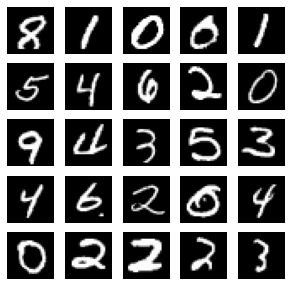

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')


## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
 
 In Keras, there are several choices for optimizers. The most commonly used optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam) and Root Mean Squared Propagation (RMSprop).

Each optimizer features tunable parameters like learning rate, momentum, and decay.
Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

In [ ]:
hidden1     = 10
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Step 5 - Train the model

In [ ]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 2s 7ms/step - loss: 1.5026 - accuracy: 0.5628 - val_loss: 0.8005 - val_accuracy: 0.8095
Epoch 2/16
118/118 [==============================] - 1s 6ms/step - loss: 0.6078 - accuracy: 0.8418 - val_loss: 0.4645 - val_accuracy: 0.8737
Epoch 3/16
118/118 [==============================] - 1s 8ms/step - loss: 0.4293 - accuracy: 0.8813 - val_loss: 0.3770 - val_accuracy: 0.8930
Epoch 4/16
118/118 [==============================] - 1s 8ms/step - loss: 0.3645 - accuracy: 0.8978 - val_loss: 0.3351 - val_accuracy: 0.9040
Epoch 5/16
118/118 [==============================] - 1s 7ms/step - loss: 0.3299 - accuracy: 0.9064 - val_loss: 0.3127 - val_accuracy: 0.9093
Epoch 6/16
118/118 [==============================] - 1s 5ms/step - loss: 0.3089 - accuracy: 0.9115 - val_loss: 0.2960 - val_accuracy: 0.9154
Epoch 7/16
118/118 [==============================] - 1s 5ms/step - loss: 0.2930 - accuracy: 0.9161 - val_loss: 0.2875 - val_accuracy: 0.9165
Epoch 

## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.24226489663124084
Test accuracy : 0.9311000108718872


### 6.2 - Plot history

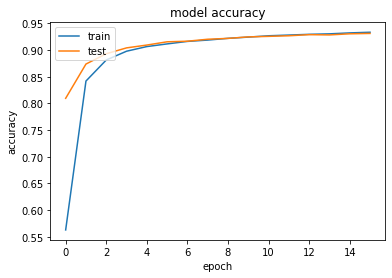

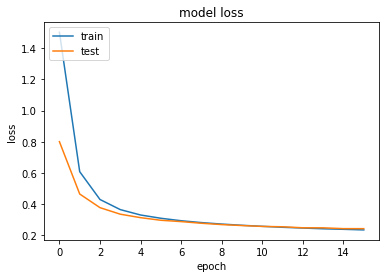

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>